In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
%matplotlib inline

#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_X_y

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler  # балансировка классов
from imblearn.pipeline import Pipeline # используем из-за чуждой балансировки

from collections import Counter

import seaborn as sns

import pickle

from ftplib import FTP  

### Начало!!

#### При подготовке в продакт, сделать принудительный путь через os.path?

In [2]:
#df = pd.read_csv('post_07_10_2020_1.csv', sep=';')
#df = pd.read_csv('Ispytat_28_01_2021_1_year.csv', sep=';')
df = pd.read_csv('Ispytat_18_02_2021_1_year.csv', sep=';')

In [3]:
df

,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
0,1,612807.0,Б/00106004,NaN,<Объект не найден> (71:a2f0002590e2e24b11eb50b...,"1178 Набор для творчества Велюрики ""Совушка""11см",шт,шт,1.0,1.0,...,50,12.0,Удалить,B,NaN,90.72,0,0.0,0.0,Лобжина Виктория Шамхорбековна(ИП)
1,2,NaN,Б/00112253,NaN,NaN,xxx,шт,NaN,1.0,1.0,...,0,0.0,Новинка,NaN,NaN,0.00,0,0.0,0.0,Котляр Мария Марковна
2,3,167010.0,00000023818,NaN,"ООО ""Арт-Пак""","R42 Вешалка пластиковая, черная, 42 см",шт,шт,150.0,1.0,...,0,150.0,Регулярный,NaN,A,29.05,0,0.0,0.0,Арт-Пак-М ООО
3,4,167012.0,00000023826,NaN,"ООО ""Арт-Пак""","V42 Вешалка пластиковая, черная, 42 см",шт,шт,100.0,1.0,...,0,100.0,Регулярный,A,B,33.57,0,0.0,0.0,Арт-Пак-М ООО
4,5,167009.0,00000023817,NaN,"ООО ""Арт-Пак""","Вешалка ""R"" 39см",шт,шт,150.0,1.0,...,0,0.0,Регулярный,NaN,A,27.26,0,0.0,0.0,Арт-Пак-М ООО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50841,50842,514112.0,00000044419,9.0,"яКлипсы, подхваты магнитные разные",Клипса-магнит 0368-0089 для штор,шт,шт,1.0,1.0,...,366,0.0,Удалить,B,NaN,108.98,0,0.0,0.0,Китай MH Industry
50842,50843,7704022.0,02/00008920,2.0,"яКлипсы, подхваты магнитные разные",Клипса-магнит 0368-0148 для штор,шт,шт,1.0,1.0,...,0,0.0,Исключенный,NaN,NaN,93.02,0,0.0,0.0,Китай MH Industry
50843,50844,7700029.0,00000045464,1.0,"яКлипсы, подхваты магнитные разные",Подхват шторный на магнитах FCG1082,пар,пар,1.0,1.0,...,0,0.0,Удалить,NaN,NaN,183.60,0,0.0,0.0,Китай TAIZHOU
50844,50845,7730854.0,Б/00108071,2.0,яЦветы искуственные,"Букет декоративный ""Цветущая вишня"" 100см 2шт",упак,упак,1.0,1.0,...,0,0.0,Удалить,NaN,NaN,390.37,0,0.0,0.0,"Китай XIAJIN HONGYUAN IMPORT & EXPORT CO.,LTD"


In [4]:
df[df['Артикул']==415019] # быстрая оценка значений классов:

,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
857,858,415019.0,00000071726,22.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,0.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
858,859,415019.0,00000071726,23.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,1.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
859,860,415019.0,00000071726,24.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,11.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
860,861,415019.0,00000071726,25.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,32.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
861,862,415019.0,00000071726,26.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,1.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
862,863,415019.0,00000071726,46.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,1.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
863,864,415019.0,00000071726,27.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,7.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
864,865,415019.0,00000071726,28.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,5.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
865,866,415019.0,00000071726,29.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,2,14.0,Регулярный,C,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
866,867,415019.0,00000071726,30.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,2,17.0,Регулярный,C,C,10.08,0,0.0,0.0,ФИДЕЯ фирма


In [5]:
df['КоэффициентЕдиницы'].unique()

array([  1.  ,   4.  , 100.  ,  10.  ,  50.  ,   5.  ,  36.  ,  72.  ,
        25.  ,  20.  ,   2.  ,   3.  ,   8.  ,  15.  ,  12.  ,   6.  ,
       144.  ,  81.  ,   6.74])

In [6]:
df[df['ЗначениеТочкиЗаказа']==27.42] #быстрая оценка признаков

,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50846 entries, 0 to 50845
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   НомерСтроки                             50846 non-null  int64  
 1   Артикул                                 50845 non-null  float64
 2   Код                                     50846 non-null  object 
 3   КодХарактеристики                       30728 non-null  float64
 4   ГруппаНоменклатуры                      50845 non-null  object 
 5   Номенклатура                            50846 non-null  object 
 6   ЕдиницаИзмерения                        50846 non-null  object 
 7   БазоваяЕдиницаИзмеренияАйриса           50766 non-null  object 
 8   ОптоваяФасовкаАйрис                     50846 non-null  float64
 9   КоэффициентЕдиницы                      50846 non-null  float64
 10  СредниеПродажи                          50846 non-null  fl

#### Начинаем работу со строками:

In [8]:
df.drop(['КоэффициентМинимальнойПоставкиИзлишков',
         'БазоваяЕдиницаИзмеренияАйриса'], axis=1, inplace=True)

In [9]:
df.dropna(subset=['Артикул', 'СтатусТовараАйриса', 'ЕдиницаИзмерения', 'ОптоваяФасовкаАйрис', 
                  'КоэффициентЕдиницы', 'Цена', 'ЗакупочнаяЦена', 'ОсновнойПоставщик'], inplace=True) # подумать насчет СтатусТовараАйриса

In [10]:
ind_for_drop = df[(df['СредниеПродажи'].isna() & df['КоличествоСделок'] > 0)
                  | (df['ЗакупкаЗаПериод'] < 0) | (df['ПроданоВсего'] < 0)
                  | (df['СтатусТовараАйриса'] == 'Исключенный')].index
df_1 = df.drop(list(ind_for_drop))  #### удалить строчки, в ктр средние продажи = 0, а кол-во сделок> 0 и т.д.

In [11]:
df_1[['КодХарактеристики', 'Артикул']] = df_1[['КодХарактеристики', 'Артикул']].astype(dtype='Int32')

In [12]:
df_1.loc[df['МинимальныйСтраховойЗапас'] < 1, 'МинимальныйСтраховойЗапас'] = 0.001 # приводим все мин ктр меньше 1 к одному числу

In [13]:
len(list(ind_for_drop))

1724

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49070 entries, 0 to 50845
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49070 non-null  int64  
 1   Артикул                    49070 non-null  Int32  
 2   Код                        49070 non-null  object 
 3   КодХарактеристики          29561 non-null  Int32  
 4   ГруппаНоменклатуры         49070 non-null  object 
 5   Номенклатура               49070 non-null  object 
 6   ЕдиницаИзмерения           49070 non-null  object 
 7   ОптоваяФасовкаАйрис        49070 non-null  float64
 8   КоэффициентЕдиницы         49070 non-null  float64
 9   СредниеПродажи             49070 non-null  float64
 10  Цена                       49070 non-null  float64
 11  ПроданоВсего               49070 non-null  float64
 12  КоличествоСделок           49070 non-null  int64  
 13  КоличествоПериодовПродаж   49070 non-null  int

In [15]:
df_1.describe(include='object')

,Код,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ОсновнойПоставщик
count,49070,49070,49070,49070,49070,35688,32565,49070
unique,26244,1032,26238,63,17,4,4,641
top,02/00035957,Астра,Бисер Preciosa 5г,шт,Регулярный,C,C,ПРОТОС и К ООО
freq,467,1612,467,28132,21394,14550,17715,2428


In [16]:
df_1[['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']].head(100)

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
0,0.001,0.0
2,0.001,0.0
3,0.001,0.0
4,0.001,0.0
5,0.001,0.0
...,...,...
99,1.000,2.0
100,1.000,2.0
101,1.000,2.0
102,1.000,2.0


In [17]:
df_1.describe()

,НомерСтроки,Артикул,КодХарактеристики,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,ЗакупочнаяЦена,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
count,49070.000000,4.907000e+04,29561.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.000000,49070.00000,49070.000000
mean,25451.982576,3.767665e+06,34.541660,16.033772,1.133202,0.839399,262.553686,9.486342,4.157550,2.126126,207.325739,144.095744,104.671352,1.80910,9.553255
std,14810.342817,1.632534e+07,76.750985,44.103949,2.625944,4.083127,719.663511,47.223272,11.071082,2.903814,166.374085,530.475422,358.590901,3.33187,26.118374
min,1.000000,1.230000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00100,0.000000
25%,12475.250000,4.993000e+05,2.000000,1.000000,1.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,6.000000,11.520000,0.00100,0.000000
50%,25672.500000,6.451175e+05,6.000000,4.000000,1.000000,0.091000,116.000000,1.000000,1.000000,1.000000,300.000000,34.165000,37.860000,0.00100,2.000000
75%,38398.750000,7.715636e+06,22.000000,12.000000,1.000000,0.605000,252.000000,6.552250,4.000000,3.000000,366.000000,128.000000,86.472500,3.00000,10.000000
max,50846.000000,7.726618e+08,774.000000,1000.000000,144.000000,394.600000,54000.000000,4014.340000,489.000000,13.000000,366.000000,35741.000000,22500.000000,100.00000,1000.000000


In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49070 entries, 0 to 50845
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49070 non-null  int64  
 1   Артикул                    49070 non-null  Int32  
 2   Код                        49070 non-null  object 
 3   КодХарактеристики          29561 non-null  Int32  
 4   ГруппаНоменклатуры         49070 non-null  object 
 5   Номенклатура               49070 non-null  object 
 6   ЕдиницаИзмерения           49070 non-null  object 
 7   ОптоваяФасовкаАйрис        49070 non-null  float64
 8   КоэффициентЕдиницы         49070 non-null  float64
 9   СредниеПродажи             49070 non-null  float64
 10  Цена                       49070 non-null  float64
 11  ПроданоВсего               49070 non-null  float64
 12  КоличествоСделок           49070 non-null  int64  
 13  КоличествоПериодовПродаж   49070 non-null  int

In [19]:
# Удаляем значения мин-макс по кол-ву менее 10!! (не будем на них обучаться!)
#df_1.groupby('ЗначениеТочкиЗаказа').nunique()

df_1['freq_z']=df.groupby(by='ЗначениеТочкиЗаказа')['ЗначениеТочкиЗаказа'].transform('count')
df_1['freq_s']=df.groupby(by='МинимальныйСтраховойЗапас')['МинимальныйСтраховойЗапас'].transform('count')

df_1 = df_1[(df_1['freq_z'] >= 10) & (df_1['freq_s'] >= 10)].drop(['freq_s', 'freq_z'],  axis=1)
#df_1.groupby(['Name','City']).filter(lambda x: sum(x['Age']) > 30)

In [20]:
X = df_1.drop(['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа'], axis=1)
y = df_1.loc[:, ['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']]   # таргет

In [21]:
#y_need = y[df_1['МинимальныйСтраховойЗапас'].isna()] # отфильтровываем неизвестные значения МИН
#X_need = X.loc[list(y_need.index)] 

#y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

#X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [22]:
y

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
0,0.001,0.0
2,0.001,0.0
3,0.001,0.0
4,0.001,0.0
5,0.001,0.0
...,...,...
50840,0.001,0.0
50841,0.001,0.0
50843,0.001,0.0
50844,0.001,0.0


In [23]:
y_need = y[(y['ЗначениеТочкиЗаказа'] == 0)]  # убрал из выражения:y['МинимальныйСтраховойЗапас'] == 0) & ....
X_need = X.loc[list(y_need.index)]

y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [24]:
y_filter_min = y_filter['МинимальныйСтраховойЗапас']
y_filter_max = y_filter['ЗначениеТочкиЗаказа']

In [25]:
y_need.shape

(23321, 2)

In [26]:
X_filter


,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,...,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,ОсновнойПоставщик
8,9,502677,Б/00085836,<NA>,"Воротники декоративные, лейсы",2785901 Аппликации пришивные лейсы полиэстер 1...,упак,1.0,1.0,0.073,...,1.000,1,1,366,47.00,Регулярный,C,C,19.60,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
9,10,502962,Б/00087278,<NA>,"Воротники декоративные, лейсы",2797325 Аппликации пришивные лейсы полиэстер 2...,упак,1.0,1.0,0.647,...,8.821,9,6,360,66.00,Регулярный,B,C,30.87,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
10,11,502963,Б/00087279,<NA>,"Воротники декоративные, лейсы",2797327 Аппликации пришивные лейсы полиэстер 2...,упак,1.0,1.0,0.415,...,2.493,2,2,162,40.00,Решение принято,B,C,33.12,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
11,12,502964,Б/00087280,<NA>,"Воротники декоративные, лейсы",2797329 Аппликации пришивные лейсы полиэстер 2...,упак,1.0,1.0,0.709,...,9.665,7,7,327,66.00,Регулярный,B,C,41.00,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
12,13,506265,Б/00081228,<NA>,"Воротники декоративные, лейсы","3020259 Воротник пришивной,кружево, 24*23,5см ...",шт,1.0,1.0,0.647,...,8.827,6,5,366,22.00,Спецзаказ,C,B,21.00,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50829,50830,7700964,00000086218,3,Цепи,"Цепь стальная 8,7*6,4*10м Y16305",м,10.0,10.0,3.645,...,49.719,20,9,366,248.54,Регулярный,A,A,52.61,Китай Yuantong
50830,50831,7700965,00000086219,2,Цепи,"Цепь стальная 9,9*7,2*10м Y1830",м,10.0,10.0,1.390,...,18.965,19,8,366,217.26,Регулярный,A,A,55.87,Китай Yuantong
50831,50832,7700965,00000086219,1,Цепи,"Цепь стальная 9,9*7,2*10м Y1830",м,10.0,10.0,1.312,...,17.902,15,8,366,143.42,Регулярный,A,A,55.87,Китай Yuantong
50832,50833,7700967,00000086221,1,Цепи,"Цепь стальная BOX 3,5*10м",м,10.0,10.0,0.256,...,3.490,5,4,366,74.93,Удалить,B,B,220.00,Китай Yuantong


In [27]:
y_filter

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
8,1.0,2.0
9,1.0,2.0
10,1.0,2.0
11,1.0,2.0
12,1.0,2.0
...,...,...
50829,2.0,10.0
50830,2.0,10.0
50831,2.0,10.0
50832,2.0,10.0


#### Построим гистограммы, чтоб визуально посмотреть на частотное распределение меток классов МИН и МАХ: 

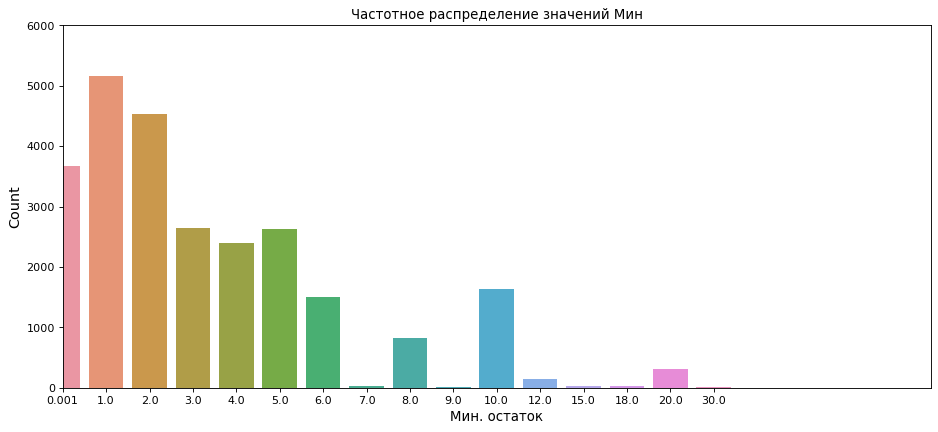

In [28]:
from matplotlib.pyplot import figure

fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
plt.title('Частотное распределение значений Мин')
plt.xlabel('Мин. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
plt.axis([0, 20, 0, 6000])
plt.show()


#fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
#plt.xlabel('Мин. остаток', fontsize=12)
#plt.ylabel('Count', fontsize=13)
#plt.axis([21, 35, 0, 6000])
#plt.show()

In [29]:
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts())
qual_min = len(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts()) # для метрик вводим переменную
print(qual_min)
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts().sum())

1.000     5154
2.000     4530
0.001     3678
3.000     2651
5.000     2623
4.000     2402
10.000    1641
6.000     1505
8.000      831
20.000     317
12.000     147
7.000       26
15.000      24
18.000      23
30.000      12
9.000       10
Name: МинимальныйСтраховойЗапас, dtype: int64
16
25574


In [30]:
qual_min

16

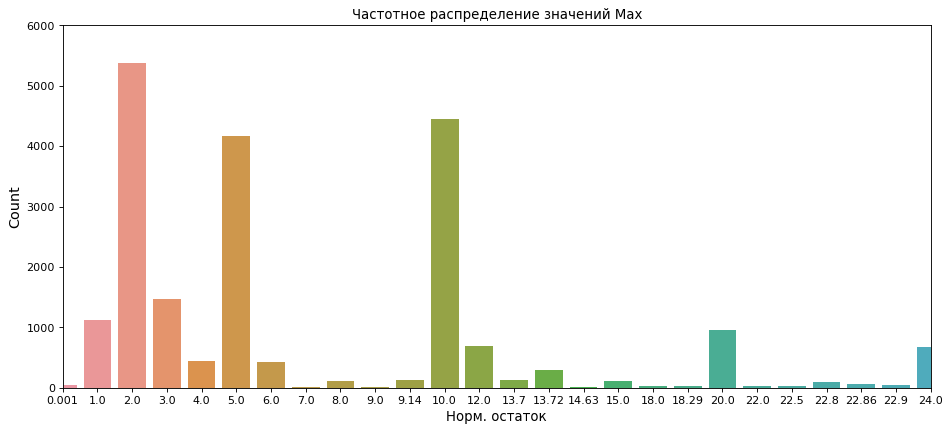

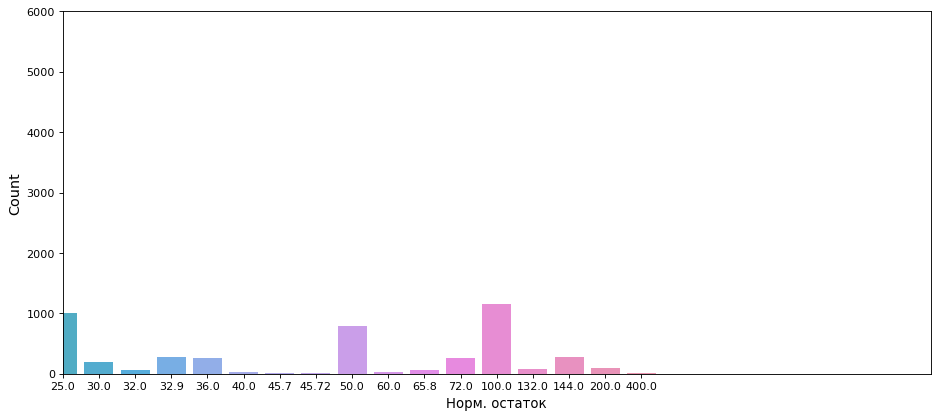

In [31]:
# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.title('Частотное распределение значений Мах')
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#ax.set(xlim=(0, 300))
plt.axis([0.0, 25, 0, 6000])
#ax.set_xticklabels(range(0,50))
plt.show()


# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#plt.xticks(y_filter.loc[:, 'Нормативный остаток'])
#ax.set(xlim=(0, 100))
plt.axis([26, 50, 0, 6000])
# ax.set_xticklabels(range(0,50))
plt.show()


In [32]:
print(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts().head(60))
qual_max = len(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts()) # для метрик вводим переменную
print(qual_max)

2.000      5374
10.000     4445
5.000      4172
3.000      1468
100.000    1155
1.000      1127
25.000     1000
20.000      949
50.000      791
12.000      691
24.000      677
4.000       444
6.000       425
13.720      289
144.000     281
32.900      277
36.000      267
72.000      255
30.000      188
13.700      132
9.140       127
8.000       111
15.000      108
22.800      101
200.000      94
132.000      78
32.000       66
65.800       61
22.860       58
22.900       54
0.001        40
22.500       33
40.000       31
60.000       30
22.000       29
18.290       26
18.000       24
7.000        21
9.000        20
14.630       17
45.720       16
45.700       13
400.000       9
Name: ЗначениеТочкиЗаказа, dtype: int64
43


#### Создаем Pipeline

In [33]:
le_min = LabelEncoder()  #Делаем label encoding
le_max = LabelEncoder()

y_filter_min_le = le_min.fit_transform(y_filter_min)
y_filter_max_le = le_max.fit_transform(y_filter_max)

In [34]:
len(y_filter_min_le)

25574

In [35]:
# Начнем трансформировать колонки, в зависимости от типа значений:
categorical_features = X_filter.select_dtypes(include=[object])

In [36]:
categorical_features = categorical_features.drop(['Номенклатура', 'Код' ], axis=1) # ненужно для обучения
categorical_features[categorical_features['КатегорияТовараАйриса'] == "A"]

,ГруппаНоменклатуры,ЕдиницаИзмерения,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ОсновнойПоставщик
52,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
54,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
58,Разное,упак (4шт),Регулярный,B,A,Лукьянова Ольга Александровна(ИП)
59,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
336,Prym,пар,Регулярный,A,A,Prym Consumer Europe GmbH - ПРИМ (Германия)
...,...,...,...,...,...,...
50826,Цепи,м,Регулярный,A,A,Китай Yuantong
50827,Цепи,м,Регулярный,B,A,Китай Yuantong
50829,Цепи,м,Регулярный,A,A,Китай Yuantong
50830,Цепи,м,Регулярный,A,A,Китай Yuantong


In [37]:
numerical_features = X_filter.select_dtypes(include=[np.number])

In [38]:
numerical_features = numerical_features.drop(['НомерСтроки', 'Артикул', 'КодХарактеристики'], axis=1) # ненужно для обучения
numerical_features

,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,ЗакупочнаяЦена
8,1.0,1.0,0.073,65.0,1.000,1,1,366,47.00,19.60
9,1.0,1.0,0.647,93.0,8.821,9,6,360,66.00,30.87
10,1.0,1.0,0.415,99.0,2.493,2,2,162,40.00,33.12
11,1.0,1.0,0.709,118.0,9.665,7,7,327,66.00,41.00
12,1.0,1.0,0.647,75.0,8.827,6,5,366,22.00,21.00
...,...,...,...,...,...,...,...,...,...,...
50829,10.0,10.0,3.645,191.0,49.719,20,9,366,248.54,52.61
50830,10.0,10.0,1.390,282.0,18.965,19,8,366,217.26,55.87
50831,10.0,10.0,1.312,282.0,17.902,15,8,366,143.42,55.87
50832,10.0,10.0,0.256,437.0,3.490,5,4,366,74.93,220.00


In [39]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25574 entries, 8 to 50833
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ОптоваяФасовкаАйрис       25574 non-null  float64
 1   КоэффициентЕдиницы        25574 non-null  float64
 2   СредниеПродажи            25574 non-null  float64
 3   Цена                      25574 non-null  float64
 4   ПроданоВсего              25574 non-null  float64
 5   КоличествоСделок          25574 non-null  int64  
 6   КоличествоПериодовПродаж  25574 non-null  int64  
 7   КоличествоДнейНаСкладе    25574 non-null  int64  
 8   ЗакупкаЗаПериод           25574 non-null  float64
 9   ЗакупочнаяЦена            25574 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.1 MB


In [40]:
len(y_filter_min_le)

25574

In [41]:
# будем вставлять 0
numerical_features_1 = numerical_features[
    ['СредниеПродажи', 'ПроданоВсего','КоличествоСделок', 'КоличествоПериодовПродаж', 'ЗакупкаЗаПериод']
]         
numerical_features_2 = numerical_features.drop(numerical_features_1.columns, axis=1)


In [42]:
# здесь устанавливаем, что заполняем нулями отсутствующ. значения
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant')

In [43]:
# указываем колонки для трансформации (общие и для мин и для мах):
numerical_features_1_col = numerical_features_1.columns  # будем вставлять 0 и производить PolynomialFeatures
numerical_features_2_col = numerical_features_2.columns  # будем только производить PolynomialFeatures
categorical_features_col = categorical_features.columns  # будем производить OHE

# указываем какой препроцессинг будем делать на разных колонках (параметры скалирования зададим непосредств.в grid_search):
numerical_transformer_1 = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
numerical_transformer_2 = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('ОНЕ', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]
)

# создаем общий трансформатор:
data_transformer_1 = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

data_transformer_2 = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

In [44]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_filter, y_filter_min_le, test_size=0.33, stratify=y_filter_min_le, random_state=42
)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_filter, y_filter_max_le, test_size=0.33, stratify=y_filter_max_le, random_state=42
)

#### Здесь остановился 08.02.2021

In [47]:
X_train_min_trans = data_transformer_1.fit_transform(X_train_min) # далее обрабатываем трансформированные значения!!
X_train_max_trans = data_transformer_2.fit_transform(X_train_max)

# pickle (сохраняем для быстрой обработки новых значений) (закомментировал пока чтоб не затереть)
pickle.dump(data_transformer_1, open('data_transformer_1.pk', 'wb'))  
pickle.dump(data_transformer_1, open('data_transformer_2.pk', 'wb'))
# load
data_transformer_1 = pickle.load(open('data_transformer_1.pk', 'rb'))
data_transformer_2 = pickle.load(open('data_transformer_2.pk', 'rb'))

In [48]:
pd.DataFrame(X_train_max_trans)

,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
0,0.000,0.000,0.0,0.0,241.0,0.000000,0.000,0.000,0.0000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.0,0.0,2.6,0.000000,0.000,0.000,0.0000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.677,9.241,10.0,5.0,235.0,6.256157,6.770,3.385,159.0950,92.410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.605,8.248,3.0,2.0,39.0,4.990040,1.815,1.210,23.5950,24.744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,30.0,0.000000,0.000,0.000,0.0000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17129,0.147,2.000,2.0,1.0,0.0,0.294000,0.294,0.147,0.0000,4.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17130,1.467,20.011,3.0,2.0,55.5,29.356137,4.401,2.934,81.4185,60.033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17131,0.000,0.000,0.0,0.0,8.0,0.000000,0.000,0.000,0.0000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17132,0.047,0.645,1.0,1.0,62.0,0.030315,0.047,0.047,2.9140,0.645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
len(X_train_max_trans[1])

1036

### балансировку делать после расщепления и только для тренировочных данных!!!:

In [50]:
#len(X_filter_trans)

In [51]:
len(y_filter_min_le)

25574

### Наконец то подошли к классификации!!

In [52]:
# 1. обратить внимание на балансировку внутри эстиматора....нужна ли она?
# 2. стандартизация нужна ли для деревьев и леса...и какая? (вроде для деревьев не нужна стандартизация) -УБРАЛ
# 3. Сейчас включен рандом форест на 5ой b 6ой версии))

In [53]:
# RandomForestClassifier
en_RF = Pipeline(
    steps=[('ros', RandomOverSampler(random_state=0)),
           ('RF', RandomForestClassifier(random_state=42, class_weight='balanced'))
          ]
)

In [54]:
# Создаем сетку поиска для RandomForestClassifier:
param_grid_rf = {
    'RF__criterion':['gini','entropy'],
    'RF__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
    #'RF__criterion':['gini'],
    #'RF__max_depth':[30,40,50,70]
}

In [55]:
grid_search_min = GridSearchCV(en_RF, param_grid=param_grid_rf)
grid_search_max = GridSearchCV(en_RF, param_grid=param_grid_rf)

In [ ]:
grid_min = grid_search_min.fit(X_train_min_trans, y_train_min)

In [ ]:
grid_min.best_params_

In [ ]:
grid_max = grid_search_max.fit(X_train_max_trans, y_train_max)

In [ ]:
grid_max.best_params_

In [ ]:
# now we  save it to a file:     (закомитил, чтоб случайно не затереть)

with open('min_name.pkl', 'wb') as f:
    #pickle.dump(grid_min, f)
    
with open('max_name.pkl', 'wb') as f:
    #pickle.dump(grid_max, f)    

In [ ]:
# and we can load it:

with open('min_name.pkl', 'rb') as f:
    grid_min_s = pickle.load(f)
    
with open('max_name.pkl', 'rb') as f:
    grid_max_s = pickle.load(f)

In [ ]:
X_test_min_trans = data_transformer_1.transform(X_test_min) # не забываем, что используем уже обученную модель на новых быстрых данных
X_test_max_trans = data_transformer_2.transform(X_test_max)

In [ ]:
pd.DataFrame(X_test_max_trans)

In [ ]:
print(grid_min_s.score(X_train_min_trans, y_train_min))
print(grid_max_s.score(X_train_max_trans, y_train_max))

In [ ]:
# 28.01.2021 Как вариант:сохранять рассчитанные параметры в течение мес для каждого магазина, а обновлять мин-макс 1 раз в неделю

In [ ]:
pred_min = grid_min_s.predict(X_test_min_trans)
pred_max = grid_max_s.predict(X_test_max_trans)

In [ ]:
# НЕ ЗАБЫТЬ СДЕЛАТЬ ОБРАТНОЕ ПРЕОБРАЗОВАН на  ЛЭЙБЛ!!!!(обратное рпеобразование делать после всех метрик, 
# иначе будет выдавать ошибку: continuous is not supported)

In [ ]:
X_test_min

In [ ]:
frame_min = [
    pd.DataFrame(pred_min, columns=['predict']), 
    pd.DataFrame(y_test_min, columns=['Минимальный остаток']).reset_index(drop=True), X_test_min[['ОптоваяФасовкаАйрис']].reset_index(drop=True)
]
frame_max = [
    pd.DataFrame(pred_max, columns=['predict']), 
    pd.DataFrame(y_test_max, columns=['Нормативный остаток']).reset_index(drop=True), X_test_max['ОптоваяФасовкаАйрис'].reset_index(drop=True)
]


In [ ]:
df3_min = pd.concat(frame_min, axis=1)
df3_max = pd.concat(frame_max, axis=1)

#### Здесь остановился 09.02.2021

In [ ]:
df3_min[df3_min['Минимальный остаток']==20] #быстрая оценка признаков

In [ ]:
# IPython.display.HTML(df3_min.to_html())

In [ ]:
# IPython.display.HTML(df3_max.to_html())

#### Посмотрим на метрики на тестовых данных: (не забываем, что у нас закодированные значения!!)

In [ ]:
accuracy_score(df3_min['Минимальный остаток'], df3_min['predict'])

In [ ]:
accuracy_score(df3_max['Нормативный остаток'], df3_max['predict'])

In [ ]:
precision_min, recall_min, fscore_min, support_min = score(df3_min['Минимальный остаток'], df3_min["predict"])
precision_macro_min, recall_macro_min, fscore_macro_min, support_macro_min = score(df3_min['Минимальный остаток'], df3_min["predict"], average='macro')
precision_micro_min, recall_micro_min, fscore_micro_min, support_micro_min = score(df3_min['Минимальный остаток'], df3_min["predict"], average='micro')



In [ ]:
# Проверка на отсутствие какого-либо класса в ПРЕДСКАЗАНИЯХ!! (именно в предсказаниях!!!)
set(df3_min['Минимальный остаток']) - set(df3_min["predict"])

In [ ]:
precision_max, recall_max, fscore_max, support_max = score(df3_max['Нормативный остаток'], df3_max["predict"])
precision_macro_max, recall_macro_max, fscore_macro_max, support_macro_max = score(df3_max['Нормативный остаток'], df3_max["predict"], average='macro')
precision_micro_max, recall_micro_max, fscore_micro_max, support_micro_max = score(df3_max['Нормативный остаток'], df3_max["predict"], average='micro')

In [ ]:
score_precision_min = pd.DataFrame((precision_min.reshape(qual_min, 1)), columns=['precision_min'])
score_recall_min = pd.DataFrame((recall_min.reshape(qual_min, 1)), columns=['recall_min'])
score_fscore_min = pd.DataFrame((fscore_min.reshape(qual_min, 1)), columns=['fscore_min'])
score_support_min = pd.DataFrame((support_min.reshape(qual_min, 1)), columns=['support_min'])
for_frame_min = [score_precision_min, score_recall_min, score_fscore_min, score_support_min] 
score_all_min = pd.concat(for_frame_min, axis=1)
score_all_min

In [ ]:
score_precision_max = pd.DataFrame((precision_max.reshape(qual_max, 1)), columns=['precision_max'])
score_recall_max = pd.DataFrame((recall_max.reshape(qual_max, 1)), columns=['recall_max'])
score_fscore_max = pd.DataFrame((fscore_max.reshape(qual_max, 1)), columns=['fscore_max'])
score_support_max = pd.DataFrame((support_max.reshape(qual_max, 1)), columns=['support_max'])
for_frame_max = [score_precision_max, score_recall_max, score_fscore_max, score_support_max] 
score_all_max = pd.concat(for_frame_max, axis=1)
score_all_max

In [ ]:
print(f'precision_macro_min={precision_macro_min}, recall_macro_min={recall_macro_min},\
 score_macro_min={fscore_macro_min}, support_macro_min={support_macro_min}')

In [ ]:
print(f'precision_macro_max={precision_macro_max}, recall_macro_max={recall_macro_max},\
 score_macro_max={fscore_macro_max}, support_macro_max={support_macro_max}')

In [ ]:
print(f'precision_micro_min={precision_micro_min}, recall_micro_min={recall_micro_min},\
 score_micro_min={fscore_micro_min}, support_micro_min={support_micro_min}')

In [ ]:
print(f'precision_micro_max={precision_micro_max}, recall_micro_max={recall_micro_max},\
 score_micro_max={fscore_micro_max}, support_micro_max={support_micro_max}')

In [ ]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_min['Минимальный остаток'], df3_min["predict"],
                               rownames=['Минимальный остаток'], colnames=["predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Минимальный остаток ')
plt.show()

In [ ]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_max['Нормативный остаток'], df3_max["predict"],
                               rownames=['Нормативный остаток'], colnames=["predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Нормативный остаток')
plt.show()

In [ ]:
confusion_matrix

#### Подготовка к заливке на общий ресурс

In [ ]:
df3_min['predict_inv'] = le_min.inverse_transform(df3_min.predict)
df3_max['predict_inv'] = le_max.inverse_transform(df3_max.predict)

df3_min['Минимальный остаток_inv'] = le_min.inverse_transform(df3_min['Минимальный остаток'])
df3_max['Нормативный остаток_inv'] = le_max.inverse_transform(df3_max['Нормативный остаток'])

df3_min['prophet'] = df3_min['predict_inv'] 
df3_max['prophet'] = df3_max[['predict_inv', 'ОптоваяФасовкаАйрис']].max(axis=1)

In [ ]:
df3_min[['Минимальный остаток_inv', 'ОптоваяФасовкаАйрис', 'predict_inv', 'prophet']]

In [ ]:
df3_max[['Нормативный остаток_inv', 'ОптоваяФасовкаАйрис', 'predict_inv', 'prophet']]

#### Здесь остановился 10.02.2021

In [ ]:
# файл заливки:
X_need_min_trans = data_transformer_1.transform(X_need)
X_need_max_trans = data_transformer_2.transform(X_need)


In [ ]:
y_pred_need_min = grid_min_s.predict(X_need_min_trans)
y_pred_need_max = grid_max_s.predict(X_need_max_trans)

In [ ]:
frame_min_need = [pd.DataFrame(y_pred_need_min, columns=['predict']),
                  pd.DataFrame(X_need[['ОптоваяФасовкаАйрис', 'Артикул', 'КодХарактеристики']].reset_index(drop=True))]
frame_max_need = [pd.DataFrame(y_pred_need_max, columns=['predict']),
                  pd.DataFrame(X_need['ОптоваяФасовкаАйрис'].reset_index(drop=True))]

In [ ]:
df4_min = pd.concat(frame_min_need, axis=1)
df4_max = pd.concat(frame_max_need, axis=1)

In [ ]:
df4_min['predict_inv_min'] = le_min.inverse_transform(df4_min.predict)
df4_max['predict_inv_max'] = le_max.inverse_transform(df4_max.predict)


In [ ]:
df4_min

In [ ]:
df4_max

In [ ]:
df5_all = pd.concat([df4_min[['ОптоваяФасовкаАйрис', 'Артикул', 'КодХарактеристики', 'predict_inv_min']] ,
                     df4_max['predict_inv_max']], axis=1)

In [ ]:
df5_all['prophet_predict_inv_max'] = df5_all[['predict_inv_max', 'ОптоваяФасовкаАйрис']].max(axis=1)

In [ ]:
#df5_all.drop(['predict_inv_max'], inplace=True, axis=1)

In [ ]:
# IPython.display.HTML(df5_all.to_html())

In [ ]:
df5_all.to_excel("df5_all_excel.xlsx") 

#### Сама заливка

In [ ]:
df5_all.to_csv('df5_all.csv', sep=';')

In [ ]:
ftp = FTP('192.168.50.48')
ftp.login('A.Mochalov','Fktrcfylh1!40')
#encoding = 'cp1251'

In [ ]:
ftp.cwd('/IT_obmen/Mochalov') 

In [ ]:
file_name = 'isp-out-18.02.2021.csv'  

In [ ]:
with open(file_name, 'rb') as fobj:
            ftp.storbinary('STOR ' + file_name, fobj)

### Комментарии:

In [ ]:
# ОТФИЛЬТРОВАТЬ СТАТУСЫ МАРКЕТ ПЛЕЙС (НАШ), ИСКЛЮЧЕННЫЙ (АЙРИС) ??????????

In [ ]:
#df3_min['prophet'] = df3_min['predict']    # 'это только для МИНИМАЛЬНОГО остатка !!!'
# df3_max['prophet'] = df3_max[['predict', 'Фасовка айрис']].max(axis=1)    # 'это только для НОРМАТИВНОГО остатка !!!'
#df3_max['prophet'] = df3_max['predict'] # т.к. было преобразование в label!!!! (иначе бы использовали строку выше)

In [ ]:
# ЧТОЬ НЕ ЗАБЫТЬ:

## xgb_clf почитать о ней


# КАК ВАРИАНТ-ИСПОЛЬЗОВАТЬ МИН(МАКС) ИЛИ МАКС(МИН) КАК ЕЩЕ ОДИН ПРИЗНАК ДЛЯ РАССЧЕТА МАКС(МИН) ИЛИ МИН(МАКС)!!!!!!

In [ ]:
# 1. Поработать с дисбалансом до testsplit (чтоб заработала стратификация)
# 2. Поигарть с метриками как в папке  MIN-MAX
# 3. Советуют попробовать так же MSE метрику (настойчиво советуют)
# 4. Добавить колонку  минимальный остаток, чтоб понимать по каким мин у нас проваливаются метрики
# 5. Может сравнение все же делать с данными без балансировки??

In [ ]:
##rfmSegmentation.to_csv('rfm-table_mark.csv', sep=';')

In [ ]:
### неплохая задумка:
### metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
### Выкладывать под определенными префиксами например : len-in-12/08/2021
### От меня: len-out-14/08/2021

In [ ]:
### 18/02/2021 если мы берем новый блок данных и пытаемся его натянуть на предыдущие значения, трансформировать тоже нужно
### трансформировать тоже нужно про предыдущим значениям, - иначе будет выскакивать ошибка о несоответсвии кол-ва признаков:
###  Number of features of the model must match the input. Model n_features is 1046 and input n_features is 1031
### и так же записывать с помощью pickle!!!!!